In [16]:
from scipy.ndimage import variance
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import laplace as llc
from skimage.transform import resize
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import pickle

In [17]:
def get_image_paths_within(directory_path):
    return list(paths.list_images(directory_path))

def get_laplace_for(image_path):
    img = io.imread(image_path)
    img = resize(img, (400, 600))
    img = rgb2gray(img)
    return llc(img, ksize=3)

def get_variance_of_laplace(laplace):
    return variance(laplace)

def get_maximum_laplace(laplace):
    return np.amax(laplace)

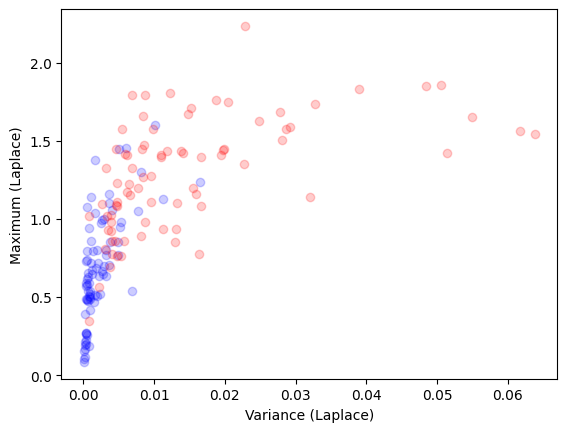

In [21]:
variance_of_laplace_values_blurry = []
max_laplace_values_blurry = []

blurry_input_directory_path = 'C:/Users/dkala/projects/blur-detection/datasets/blurry'
for blurry_image_path in get_image_paths_within(blurry_input_directory_path):
    laplace = get_laplace_for(blurry_image_path)
    variance_of_laplace_values_blurry.append(get_variance_of_laplace(laplace))
    max_laplace_values_blurry.append(get_maximum_laplace(laplace))

variance_of_laplace_values_sharp = []
max_laplace_values_sharp = []

sharp_input_directory_path = 'C:/Users/dkala/projects/blur-detection/datasets/sharp'
for sharp_image_path in get_image_paths_within(sharp_input_directory_path):
    laplace = get_laplace_for(sharp_image_path)
    variance_of_laplace_values_sharp.append(get_variance_of_laplace(laplace))
    max_laplace_values_sharp.append(get_maximum_laplace(laplace))
    
fig, ax = plt.subplots()

ax.scatter(variance_of_laplace_values_blurry, max_laplace_values_blurry, color='blue', alpha=0.2)
ax.scatter(variance_of_laplace_values_sharp, max_laplace_values_sharp, color='red', alpha=0.2)

plt.xlabel('Variance (Laplace)')
plt.ylabel('Maximum (Laplace)')

plt.show()

def get_laplace_values_from(variances, maximums):
    values = []
    index = 0
    while (index < len(variances)):
        values.append([variances[index], maximums[index]])
        index = index + 1
    return values

blurry_laplace_values = get_laplace_values_from(variance_of_laplace_values_blurry, max_laplace_values_blurry)

sharp_laplace_values = get_laplace_values_from(variance_of_laplace_values_sharp, max_laplace_values_sharp)

labels = np.concatenate((np.ones((80, )), np.zeros((80, ))), axis=0)
laplace_values = np.concatenate((np.array(sharp_laplace_values), np.array(blurry_laplace_values)), axis=0)

In [22]:
clf = svm.SVC(kernel='linear', C=100000)
clf.fit(laplace_values, labels)

with open('blur-detection-model.pkl', 'wb') as f:
    pickle.dump(clf, f)